In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os
import tqdm
import tensorflow

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import gray2rgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121

from keras import optimizers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
import keras.backend as K
from typing import Optional

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [5]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/AD-CN/AD-CN/train',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 867 images belonging to 2 classes.


In [6]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/AD-CN/AD-CN/train',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  batch_size = 32)

Found 216 images belonging to 2 classes.


In [7]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/AD-CN/AD-CN/test',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 323 images belonging to 2 classes.


In [ ]:
base_model = DenseNet121(input_shape=(224,224,3),
                   include_top=False,
                   weights="imagenet")

29084464/29084464 [==============================] - 1s 0us/step


In [ ]:

for layer in base_model.layers:
    layer.trainable=False



In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),

]

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=METRICS)

In [ ]:
history=model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs = 20,
                        verbose = 1,
                         )

Epoch 1/20
28/28 [==============================] - 204s 7s/step - loss: 0.6180 - accuracy: 0.6597 - precision: 0.5986 - recall: 0.6605 - auc: 0.7117 - val_loss: 0.4571 - val_accuracy: 0.8241 - val_precision: 0.8889 - val_recall: 0.6809 - val_auc: 0.8868
Epoch 2/20
28/28 [==============================] - 17s 599ms/step - loss: 0.5259 - accuracy: 0.7659 - precision: 0.7091 - recall: 0.7825 - auc: 0.8277 - val_loss: 0.3711 - val_accuracy: 0.8519 - val_precision: 0.8605 - val_recall: 0.7872 - val_auc: 0.9162
Epoch 3/20
28/28 [==============================] - 16s 583ms/step - loss: 0.4493 - accuracy: 0.8097 - precision: 0.7598 - recall: 0.8223 - auc: 0.8825 - val_loss: 0.3170 - val_accuracy: 0.8843 - val_precision: 0.8791 - val_recall: 0.8511 - val_auc: 0.9360
Epoch 4/20
28/28 [==============================] - 16s 583ms/step - loss: 0.4083 - accuracy: 0.8339 - precision: 0.7821 - recall: 0.8568 - auc: 0.8982 - val_loss: 0.3070 - val_accuracy: 0.8935 - val_precision: 0.8817 - val_recall:

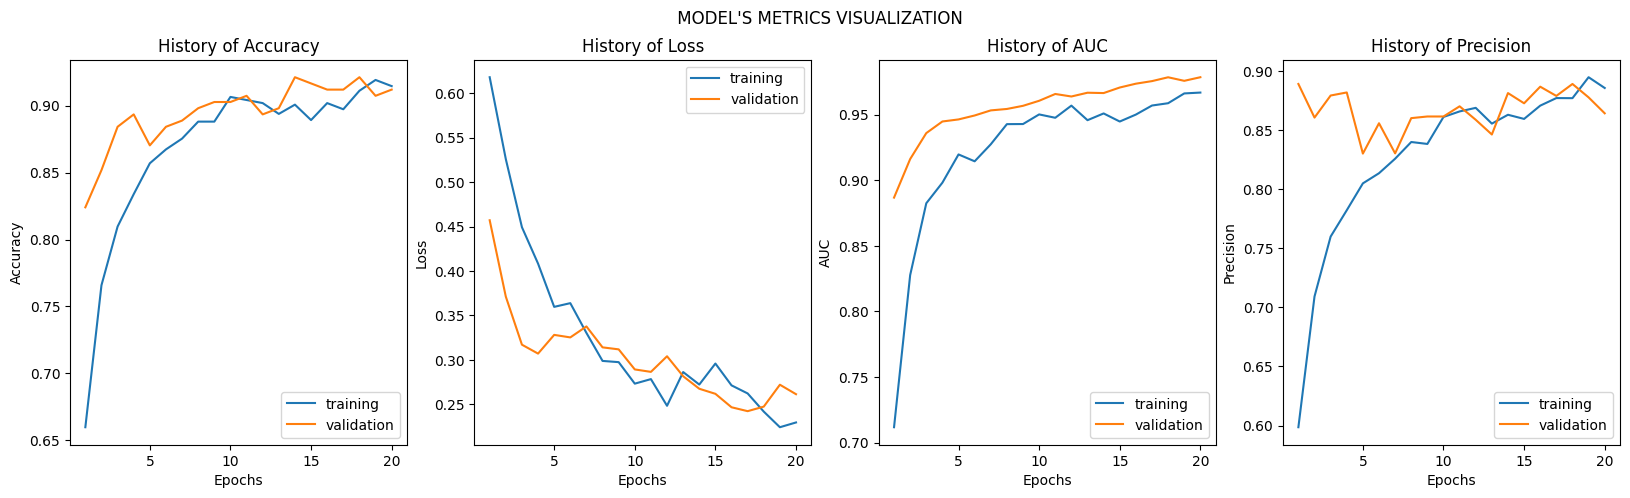

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision):

    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])


    plt.show()



Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision']
              )

In [1]:
from keras.models import load_model
model.save("network.h5")

NameError: name 'model' is not defined

In [11]:
from keras.models import load_model
loaded_model = load_model("network.h5")
score= loaded_model.evaluate(test_dataset)

11/11 [==============================] - 124s 11s/step - loss: 0.2596 - accuracy: 0.9133 - precision: 0.9193 - recall: 0.9080 - auc: 0.9724


In [12]:
print("Accuracy = ", score[1])
print("Precision = ", score[2])
print("Recall = ", score[3])
print("AUC = ", score[4])


Accuracy =  0.9133126735687256
Precision =  0.9192546606063843
Recall =  0.907975435256958
AUC =  0.9723925590515137


1/1 [==============================] - 0s 70ms/step


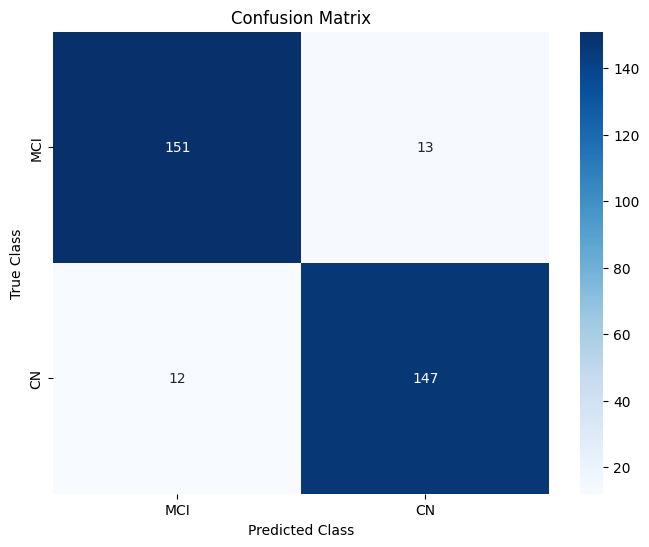

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


test_dataset.batch_size = 32

y_true = []
y_pred = []


for batch, labels in test_dataset:

    predictions = loaded_model.predict(batch)
    predictions = (predictions > 0.5).astype(int).flatten()


    y_true.extend(labels)
    y_pred.extend(predictions)

    if len(y_true) >= len(test_dataset.filenames):
        break

conf_matrix = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 6))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['MCI', 'CN'], yticklabels=['MCI', 'CN'])

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()
